# Finals Summary 9-12


## Word Cloud

In [25]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1. make a df out of this 'tripadvisor_hotel_reviews.csv'
2. rename all columns to be in lowercase letters
3. make a word cloud with the first 2000 reviews, but only the nouns
    (remember to tokenize and use only words/numbers)
    (remember to lemmatize, so that words aren't presented double)
4. change the size of the figure
5. save the wordcloud as a png

THERE IS MORE WAYS ON HOW TO COLOR THE WORD CLOUDS ETC. IN WEEK9

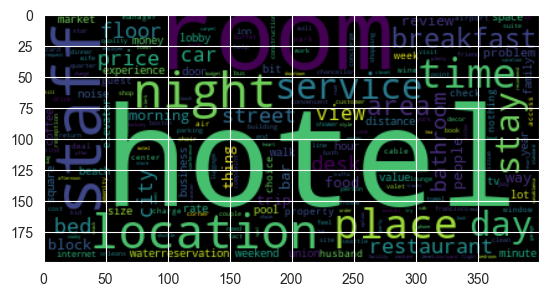

In [26]:
reviews = pd.read_csv('resources/tripadvisor_hotel_reviews.csv')
reviews = reviews.rename(columns=str.lower)  # ToDo ----------------------------------

tokens = nltk.word_tokenize(" ".join(reviews.review[0:2000]))
filtered_tokens = [t for t in tokens if t.isalnum()]
nouns = [word for word, pos in nltk.pos_tag(filtered_tokens) if pos.startswith('N')]
wnl = WordNetLemmatizer()
lemmatized = [wnl.lemmatize(word, pos='n') for word in nouns]
frequency_dis_nouns = nltk.FreqDist(lemmatized)

wordcloud = WordCloud().generate_from_frequencies(frequency_dis_nouns)
plt.imshow(wordcloud, interpolation='bilinear')

In [27]:
from PIL import Image
import numpy as np

6. generate a wordcloud from upvote.png (use the shape and the color of the image)

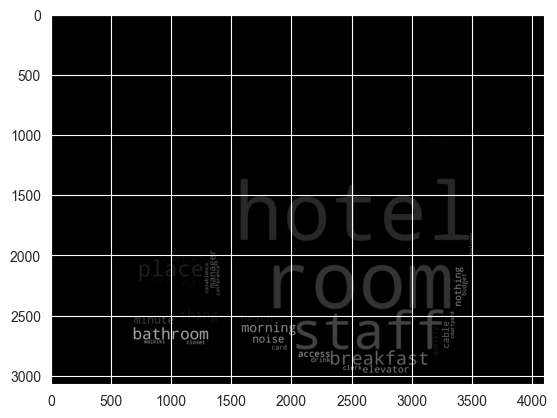

In [28]:
upvote_pic = np.array(Image.open('resources/upvote.png'))
image_colors = ImageColorGenerator(upvote_pic)
wordcloud = WordCloud(mask=upvote_pic, color_func=image_colors).generate_from_frequencies(frequency_dis_nouns)
plt.imshow(wordcloud, interpolation='bilinear')

## Social Network Analysis

In [29]:
import networkx as nx
from pyvis import network as net
import matplotlib.pyplot as plt
%matplotlib inline

1. Create a graph
2. add one node
3. add 4 nodes
4. draw the graph

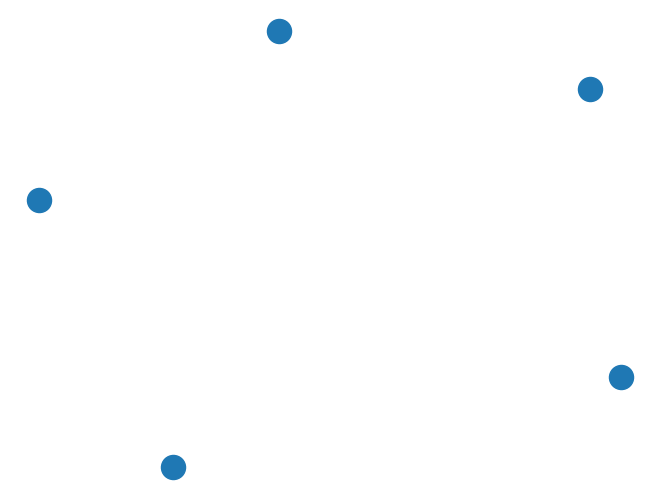

In [30]:
Graph = nx.Graph()
Graph.add_node(1)
Graph.add_nodes_from([2, 3, 4, 5])
nx.draw(Graph)

**Create Graphs**
- **G = nx.gnc_graph(20)**
    built by adding nodes one at a time with a link to one previously added node (chosen uniformly at random) and to all of that node's successors
- **G= nx.gnp_random_graph(20, 0.2, directed=False)**
    creates a gnp/binomial graph with 20 edges and the probability of 0.2 (not directed)
- **G = nx.complete_graph(8)**
    draws a complete graph (all nodes have edges to all other nodes)

**Ways of drawing a graph**
node color, labels, etc. can be added in the same way as in the default method
- nx.draw_circular(G)
- nx.draw_spring(G)
- nx.draw_kamada_kawai(G)
- nx.draw_random(G)
- nx.draw_shell(G)
- nx.draw_spectral(G) (spectral-2D-layout)

1. Get all the information that you can gather about the graph and print it

In [31]:
info = nx.info(Graph)  # ToDo ----------------------------------
# print(info)

C:\Users\sonja\AppData\Local\Temp\ipykernel_44632\1353165096.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  info = nx.info(Graph)  # ToDo ----------------------------------


- create a gnc graph with 7 nodes
- label all the nodes in the graph and draw it in a circular layout

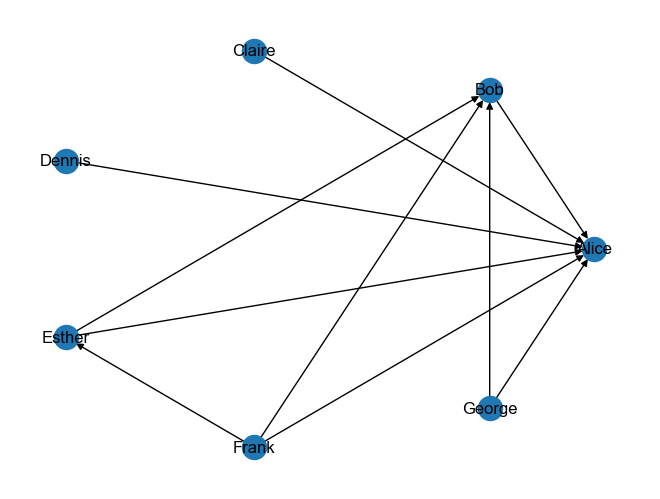

In [32]:
gnc = nx.gnc_graph(7)
nx.draw_circular(gnc, labels={0: 'Alice', 1: 'Bob', 2: 'Claire', 3: 'Dennis', 4: 'Esther', 5: 'Frank', 6: 'George'}, with_labels=True)

- convert the graph to an undirected graph

In [33]:
Graph.to_undirected()

- create a fruchterman-reingold-layout, size = (5,5) and draw the network

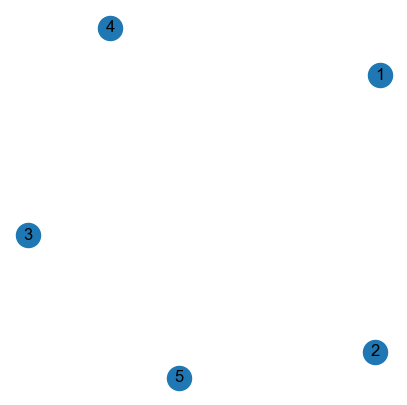

In [34]:
layout = nx.fruchterman_reingold_layout(Graph)
plt.figure(figsize=(5, 5))
plt.axis('off')
nx.draw_networkx(Graph, layout)

**Zachary's karate club**
1. print out the number of nodes, the number of edges (separately)
2. print out all the nodes (with the data in the nodes)

In [35]:
G = nx.karate_club_graph()
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

3. print out which club node 5 is

In [36]:
G.nodes[5]['club']

'Mr. Hi'

Let's try using pyvis ***???***

# Centrality Measure
- **degree centrality** degree = nx.degree_centrality(G)
- **closeness centrality** closeness = nx.closeness_centrality(G)
- **betweenness centrality** betweenness = nx.betweenness_centrality(G)
- **eigenvector centrality** computes the centrality for a node based on the centrality of its neighbors. Eigenvector_i = **LOOK UP**
    eigenvector = nx.eigenvector_centrality(G)


- **degree assortativity** the similarity of connections in the graph with respect to the node degree
    nx.degree_assortativity_coefficient(G)

# Community Structure
    **TODO** (week 10)

1. get the data from 'quaker_edge.csv' and 'quaker_node.csv'
2. create a graph from that data
3. get the basic info

In [38]:
edges = pd.read_csv('resources/quaker_edge.csv')
nodes = pd.read_csv('resources/quaker_node.csv')
G = nx.Graph()
G = nx.from_pandas_edgelist(edges, source='Source', target='Target')
nx.info(G)

C:\Users\sonja\AppData\Local\Temp\ipykernel_44632\1658526783.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 119 nodes and 174 edges'

4. calculate degree, betweenness and eigenvector centrality and add it as columns in the nodes dataframe

{'George Keith': 0.18384690867915346,
 'Robert Barclay': 0.0515053715043734,
 'Benjamin Furly': 0.18785206346916503,
 'Anne Conway Viscountess Conway and Killultagh': 0.024995365498222864,
 'Franciscus Mercurius van Helmont': 0.05053532554047185,
 'William Penn': 0.2703220115399868,
 'George Fox': 0.4491750710859923,
 'George Whitehead': 0.2497455334914196,
 'William Bradford': 0.06812170326615952,
 'James Parnel': 0.03109481243243453,
 'Stephen Crisp': 0.040856371188243465,
 'Peter Collinson': 0.006998347503803876,
 'John Bartram': 0.006998347503803876,
 'James Logan': 0.04447446026748654,
 'Joseph Wyeth': 0.023938569252885723,
 'Thomas Ellwood': 0.17608142535843851,
 'Alexander Skene of Newtyle': 8.138875606113617e-16,
 'Lilias Skene': 8.138875606113617e-16,
 'Dorcas Erbery': 0.0455839862351594,
 'James Nayler': 0.33529741004478675,
 'William Mucklow': 0.06106681323567699,
 'William Dewsbury': 0.11057869321157117,
 'Edward Burrough': 0.23147427604862292,
 'John Crook': 0.132715812688

5. set the name as the index on each node

6. incorporate the nodes into the graph

Now you can answer questions like
- who is the most influencal guy?
    nodes_pandas.sort_values(by='eigenvector', ascending=False)
- How assortative is the network?
    nx.degree_assortativity_coefficient(G)
- What is the assorivity coefficient for the node attribute 'Gender'
    nx.attribute_assortativity_coefficient(G, 'Gender')

## Supervised Machine Learning

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [43]:
weather = ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Sunny',
           'Cloudy', 'Overcast', 'Rainy']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

1. encode categorical data into numerical data: weather, temperature and play
2. Then pair the numerical weather with the numerical temperature and print the result

In [44]:
labelEncoder = preprocessing.LabelEncoder()
weather_encoded = labelEncoder.fit_transform(weather)
temp_encoded = labelEncoder.fit_transform(temp)
play_encoded = labelEncoder.fit_transform(play)

weather_temp = list(zip(weather_encoded, temp_encoded))

3. KNN: perform knn on the paired result (use the play list)
4. predict a random pair (e.g., 'Sunny' and 'Cold')

In [47]:
knn = KNeighborsClassifier()
knn.fit(weather_temp, play_encoded)
knn.predict([[0,0]])

array([1], dtype=int64)

KNN 2nd example - fruits
1. import the fruit.txt
2. print our all the categories of fruit there is
3. print out how many rows and columns the data has
4. print out how many there is of each fruit
5. print out all the info of the dataset
6. // Some countplor or something??

In [55]:
fruits = pd.read_csv('resources/fruit.txt', sep='\t')
# fruits['fruit_name'].unique()
fruits.groupby(by='fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


The goal is to make a model that given the mass, width and height of a fruit can determine the label of the fruit
1. split everything into train and test data
2. print out all the info of the X_train data set

In [62]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 30 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass    47 non-null     int64  
 1   width   47 non-null     float64
 2   height  47 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


3. plot the width, height and mass as a subplot 111 (with the train data)

In [ ]:
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

4. use knn on the x_train and y_train
5. print out the score

5. make a look-up-dictionary so that the result will be printed out and not just the numerical value
6. print the result of a random fruit (e.g., 20, 6, 5.5)

KNN 3rd example - Iris
1. import the iris data set
2. print all the feature names
3. print the targets/species and the respective names

In [ ]:
from sklearn import datasets


4. create a dataframe with sepal length and -width, petal length and -width, and the species
5. use iloc to split the dataframe in x and y
6. split the data in train and test data
7. print all the info about x_train

8. perform knn
9. predict with the test data
10. test the accuracy with the test data and print this